DIFFUSION INTERVENTIONS

In [1]:
from nnsight.models.DiffusionModel import DiffusionModel
import torch
from PIL import Image
model = DiffusionModel("CompVis/stable-diffusion-v1-4", dispatch=True).to('cuda:0')

/share/u/imgr/miniconda3/envs/nnsight/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Keyword arguments {'trust_remote_code': True} are not expected by StableDiffusionPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 18.38it/s]


In [9]:
generator = torch.Generator()
generator.manual_seed(40)

<div style="text-align:center;">
    <img src="img/diff1-4img.jpg" alt="title" width="600">
</div>

In [3]:
#FUNCTION TO PLOT IMAGES
import matplotlib.pyplot as plt

def plot_layers(images):
    plt.figure(figsize=(100,20))
    for m in range(len(images)):
        plt.subplot(1, len(images), m+1)
        plt.title(f"layer{m+1}")
        plt.imshow(zzz.images[0])
    plt.show

In [7]:
#LAYER PATHS IN THE RIGHT ORDER

my_self_layers =[
    '.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1',
    '.unet.down_blocks.0.attentions.1.transformer_blocks.0.attn1',
    '.unet.down_blocks.1.attentions.0.transformer_blocks.0.attn1',
    '.unet.down_blocks.1.attentions.1.transformer_blocks.0.attn1',
    '.unet.down_blocks.2.attentions.0.transformer_blocks.0.attn1',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1',
    '.unet.mid_block.attentions.0.transformer_blocks.0.attn1',
    '.unet.up_blocks.1.attentions.0.transformer_blocks.0.attn1',
    '.unet.up_blocks.1.attentions.1.transformer_blocks.0.attn1',
    '.unet.up_blocks.1.attentions.2.transformer_blocks.0.attn1',
    '.unet.up_blocks.2.attentions.0.transformer_blocks.0.attn1',
    '.unet.up_blocks.2.attentions.1.transformer_blocks.0.attn1',
    '.unet.up_blocks.2.attentions.2.transformer_blocks.0.attn1',
    '.unet.up_blocks.3.attentions.0.transformer_blocks.0.attn1',
    '.unet.up_blocks.3.attentions.1.transformer_blocks.0.attn1',
    '.unet.up_blocks.3.attentions.2.transformer_blocks.0.attn1'
]

my_cross_layers =[
    '.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.0.attentions.1.transformer_blocks.0.attn2',
    '.unet.down_blocks.1.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.1.attentions.1.transformer_blocks.0.attn2',
    '.unet.down_blocks.2.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2',
    '.unet.mid_block.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.2.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.2.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.2.transformer_blocks.0.attn2'
]

In [5]:
#Embedding for empty prompt
prompt_embeds, negative_prompt_embeds = model.pipeline.encode_prompt("", torch.device("cuda"), 1, False, None) #tokens for empty prompt
# if model.pipeline.do_classifier_free_guidance:
#     prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds])

In [23]:
def inspect_module(m):
    with model.generate('blue elephant', num_inference_steps=50, generator=generator, validate=False, scan=False): #
        
        modules = model._envoy.envoys(lambda envoy : envoy._module_path.endswith('attn1') or envoy._module_path.endswith('attn2')) #for all self and cross attn right now

        for module in modules:
            #print(module._module_path)
            #print(module)    

            if module._module_path != my_self_layers[m]:
                    
                for i in range(0, 50): #timesteps          
                    if i != 0:
                        module.next() #this is how you tell the module that we are working with the next iteration

                    module.input[1]['encoder_hidden_states'] = prompt_embeds #give it the attention map for empty prompt
                    #module.output[:] = 0 #ablate the attention map
                    #maybe if we dont set to 0 but to empty prompt?
                #print("ablated")
                    
            else:
                print('KEPT ONLY', module._module_path)
                    #OR WOULD INCFREASING THE TARGET LAYER HELP?
                    # for i in range(0, 50): #timesteps
                    #     if i != 0:
                    #         module.next() #this is how you tell the module that we are working with the next iteration
                        
                    #     module.output[:] =+ 1

                #TO PLAY WITH TIMESTEPS
                # for i in range(50): #timesteps    
                #     if i != 0:
                #         module.next() #this is how you tell the module that we are working with the next iteration
                        
                    #module.output[:] = 0 #ablates output
                    #shapes.append((module._module_path, module.output.shape.save()))
        zzz = model.output.save()
    return zzz
    #plt.imshow(zzz.images[0])
    #return(zzz.images[0])

#             zzz = model.output.save()

#     plt.subplot(1, 16, m+1)
#     plt.imshow(zzz.images[0])
# plt.show

#zzz.images[0].save('try.png')

KEPT ONLY .unet.up_blocks.1.attentions.0.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.62it/s]


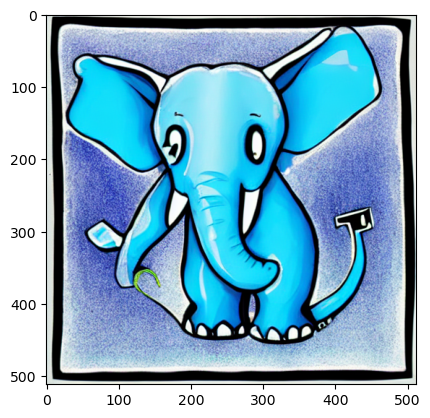

In [24]:
zzz = inspect_module(7)
plt.imshow(zzz.images[0])

KEPT ONLY .unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.64it/s]


KEPT ONLY .unet.down_blocks.0.attentions.1.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.63it/s]


KEPT ONLY .unet.down_blocks.1.attentions.0.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.67it/s]


KEPT ONLY .unet.down_blocks.1.attentions.1.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.61it/s]


KEPT ONLY .unet.down_blocks.2.attentions.0.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.60it/s]


KEPT ONLY .unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.60it/s]


KEPT ONLY .unet.mid_block.attentions.0.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.59it/s]


KEPT ONLY .unet.up_blocks.1.attentions.0.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.57it/s]


KEPT ONLY .unet.up_blocks.1.attentions.1.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.52it/s]


KEPT ONLY .unet.up_blocks.1.attentions.2.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.52it/s]


KEPT ONLY .unet.up_blocks.2.attentions.0.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.51it/s]


KEPT ONLY .unet.up_blocks.2.attentions.1.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.50it/s]


KEPT ONLY .unet.up_blocks.2.attentions.2.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.49it/s]


KEPT ONLY .unet.up_blocks.3.attentions.0.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.48it/s]


KEPT ONLY .unet.up_blocks.3.attentions.1.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.47it/s]


KEPT ONLY .unet.up_blocks.3.attentions.2.transformer_blocks.0.attn1


100%|██████████| 50/50 [00:05<00:00,  8.47it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

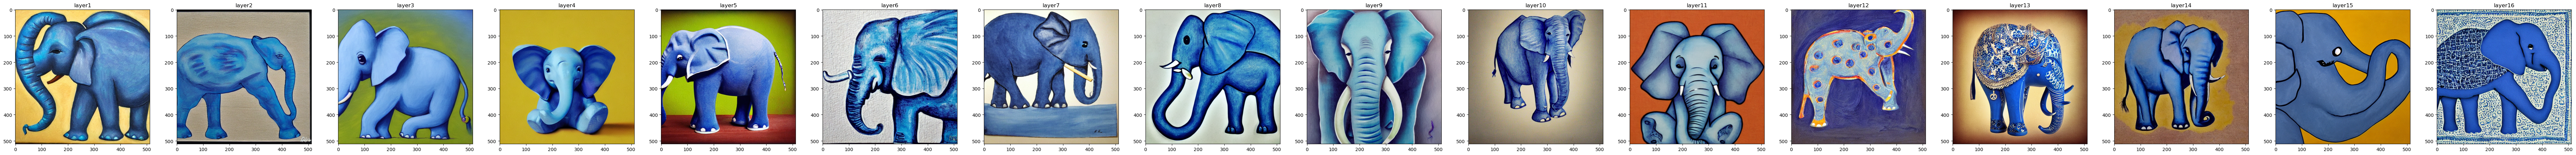

In [26]:
plt.figure(figsize=(100,20))
for m in range(16):
    zzz = inspect_module(m)
    plt.subplot(1, 16, m+1)
    plt.title(f"layer{m+1}")
    plt.imshow(zzz.images[0])
plt.show